# Inspect CVPR 2018 WAD Dataset

## Load Dependencies

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from time import time

%matplotlib qt5

from project import wad_data

C:\Program Files\Python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


## Set Parameters

In [2]:
# SET THESE AS APPROPRIATE FOR YOUR TEST PLATFORM
root_data_dir = 'G:\\Team Drives\\COML-Summer-2018\\Data\\CVPR-WAD-2018'
subset = 'train'

## Load and Prepare Dataset

In [3]:
start_time = time()

wad = wad_data.WADDataset()
wad.load_data(root_data_dir, subset)
wad.prepare()

print('[TIME] Time to Load and Prepare Dataset = {} seconds'.format(time() - start_time))

# Check number of classes and images
print('No. Images:\t{}'.format(wad.num_images))
print('No. Classes:\t{}'.format(len(wad.class_info)))

[TIME] Time to Load and Prepare Dataset = 0.1736009120941162 seconds
No. Images:	37689
No. Classes:	36


## Test Single Image and Masks

[TIME] Time to Generate Masks = 1.1846485137939453 seconds


Showing Image No. 28717


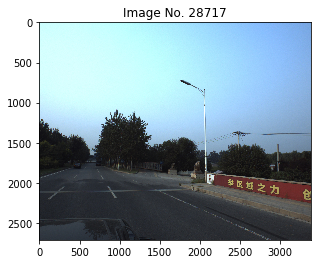

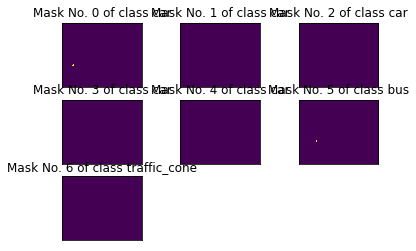

In [4]:
# Choose a random image to display
which_image = np.random.randint(0, wad.num_images)

# Display original image
plt.figure(0)
plt.title('Image No. {}'.format(which_image))
plt.imshow(wad.load_image(which_image))

# Display masks if available
if wad.image_info[which_image]['mask_path'] is not None:
    # Generate masks from file
    start = time()

    masks, labels = wad.load_mask(which_image)
    num_masks = masks.shape[2]

    print('[TIME] Time to Generate Masks = {} seconds'.format(time() - start))

    # Set up grid of plots for the masks
    rows, cols = math.ceil(math.sqrt(num_masks)), math.ceil(math.sqrt(num_masks))
    plt.figure(1)

    # Plot each mask
    for i in range(num_masks):
        instance_class = wad_data.class_names[wad_data.index_to_classes[labels[i]]]

        frame = plt.subplot(rows, cols, i+1)
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        plt.title('Mask No. {0} of class {1}'.format(i, instance_class))
        plt.imshow(np.uint8(masks[:, :, i]))

print('Showing Image No. {}'.format(which_image))
plt.show()